In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


path=r"C:\Users\user\Documents\naresh it\data files\Visadataset.csv"

visa_df=pd.read_csv(path)
visa_df



cat_list=visa_df.select_dtypes(include='object').columns
num_list=visa_df.select_dtypes(exclude='object').columns
num_list

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Box plot**

- Box plot is used to indentify the outliers 
- outlier is observation having huge positive value or huge negtive value 
- Q1 = 25p ,Q2= 50p ,Q3 = 75p 
- IQR = inter quartile range = Q3-Q1
- Q3 + 1.5*IQR and Q1-1.5IQR
-`

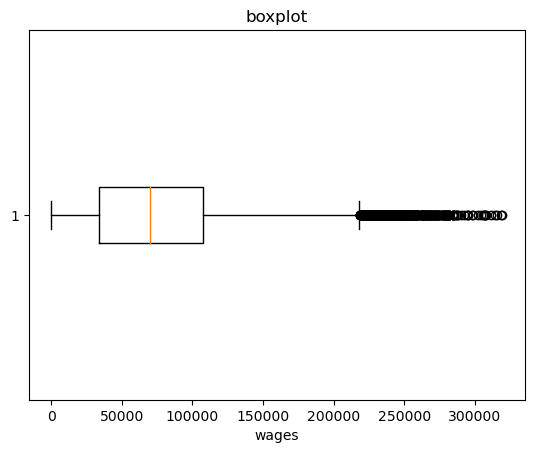

In [2]:
# read the the preivailing wageand plot the box plot 
wage_data = visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

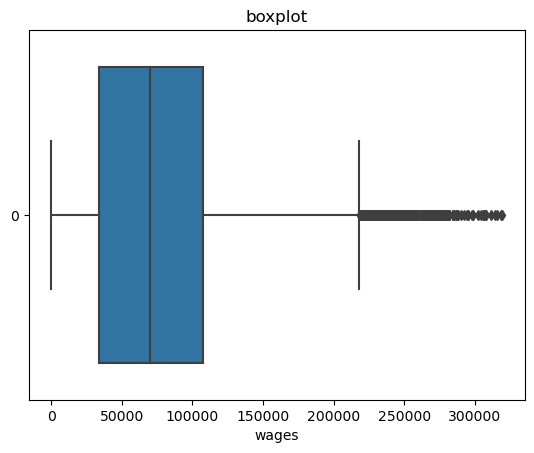

In [3]:
wage_data = visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('boxplot')
plt.xlabel('wages')
plt.show()

**plot histogram and box plot side by side**

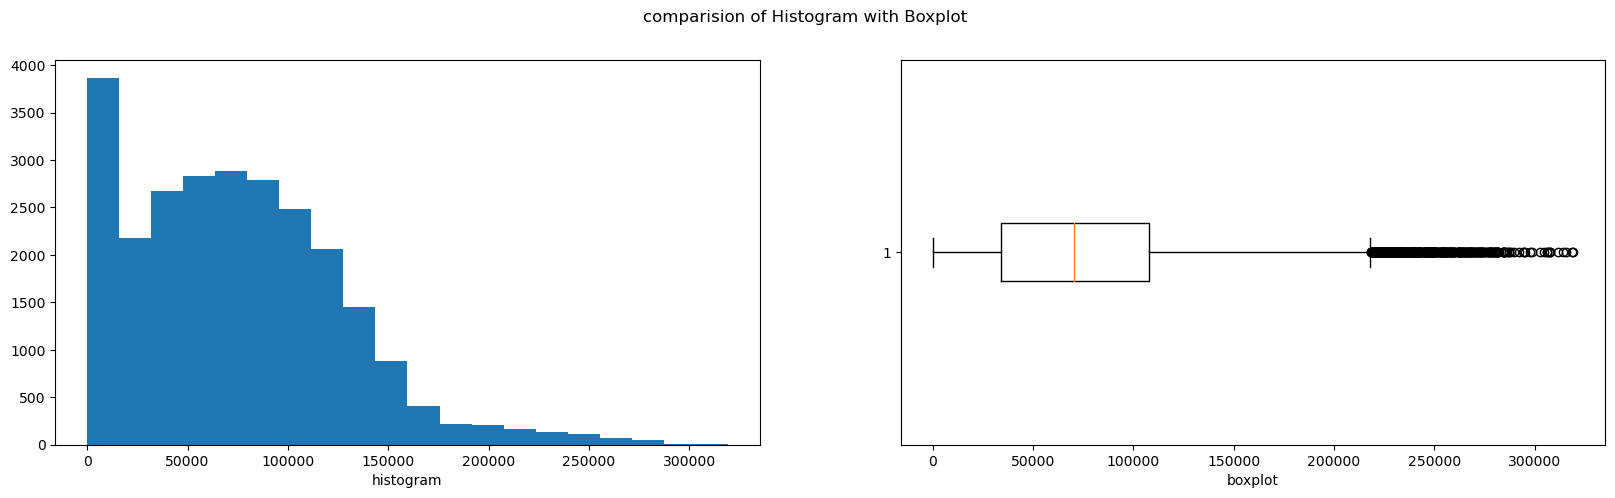

In [4]:
plt.figure(figsize=(20,5))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('histogram')

plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')

plt.show()

**Finding the outliers**

- we already know that outlirs available Q1-1.5*IQR and Q3+1.5*IQR

step-1:
    calciulate Q1=25p
    calculate Q2=50p
    calculate Q3=75p
step-2:
    calculate IQR=Q3-Q1
step-3:
    - calculate LB = Q1-1.5*IQR
    - calculate UB = Q3+1.5*IQR
    
step4:
    con1 =wage_data<LB
    con2 = wage_data>UB
    con3 = con1 or-and con2
step5:
    data[con3]
    

In [5]:

Q1=np.percentile(visa_df["prevailing_wage"],25)
Q1

34015.479999999996

In [6]:
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q2

70308.20999999999

In [7]:
Q3=np.percentile(visa_df["prevailing_wage"],75)
Q3

107735.51250000001

In [8]:
IQR = Q3-Q1
IQR

73720.03250000002

In [9]:
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
LB,UB

(-76564.56875000002, 218315.56125000003)

In [10]:
con1 =wage_data<LB
con2 = wage_data>UB
con3 = con1 | con2

outlier_data = wage_data[con3]
outlier_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [11]:
outlier_df = visa_df[con3]
outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [12]:
con1 =wage_data>LB
con2 = wage_data<UB
con3 = con1 & con2

outlier_data = wage_data[con3]
outlier_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [13]:
non_outlier_df= visa_df[con3]
non_outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


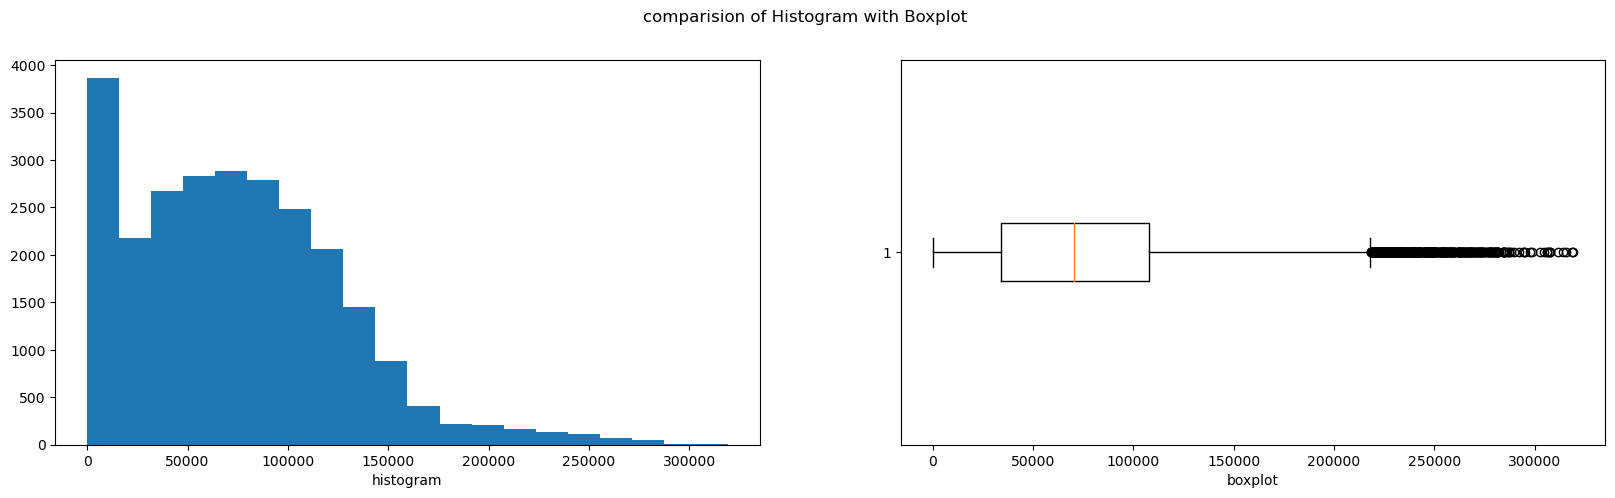

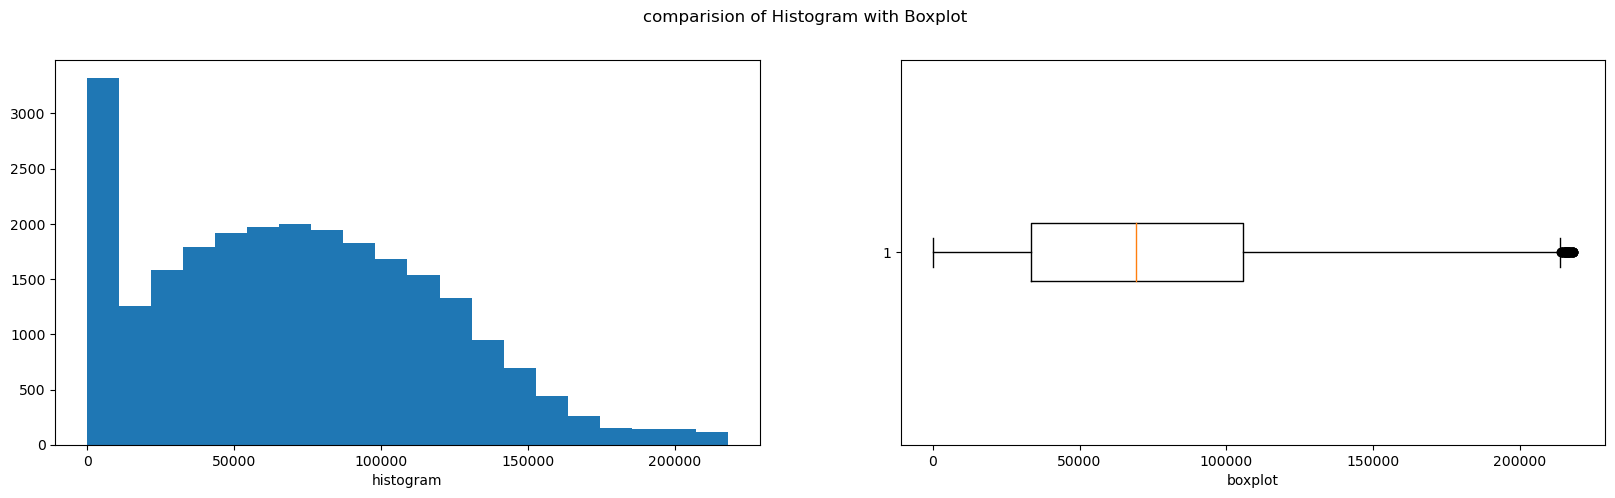

In [14]:
plt.figure(figsize=(20,5))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('histogram')

plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')


wagedata_non_outliers=non_outlier_df["prevailing_wage"]
plt.figure(figsize=(20,5))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wagedata_non_outliers,bins=20)
plt.xlabel('histogram')

plt.subplot(1,2,2).boxplot(wagedata_non_outliers,vert=False)
plt.xlabel('boxplot')

plt.show()

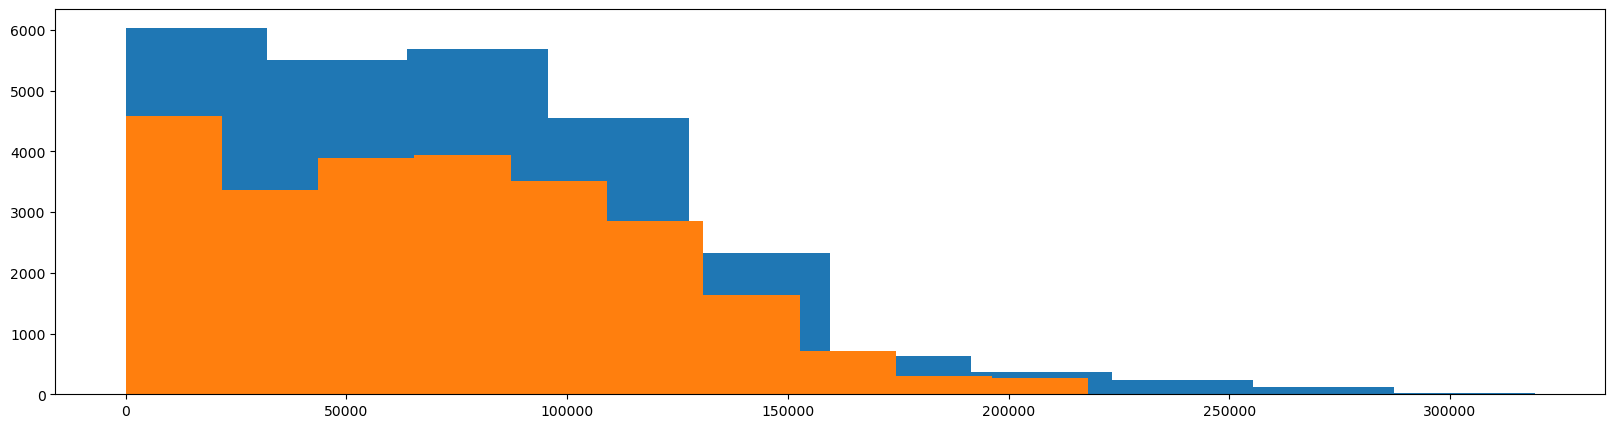

In [15]:


wagedata_non_outliers=non_outlier_df["prevailing_wage"]
wage_data=visa_df["prevailing_wage"]
plt.figure(figsize=(20,5))
plt.hist(wage_data)
plt.hist(wagedata_non_outliers)



plt.show()

**how to deal the outliers**

- we can drop the outliers 
    - dropping outliers is easy task but not recommended 
    - if we drop the outliers means we are droping rows
    - which means dropping other column values also
    - may be some important information we might loose other columns 
    - but in indusrty if outliers percentage is less than 2% of totaldata,we can drop
    - the number of outliers in page is 427
    - the number of total observation are 25480
    - the percentage is 1.67 which is less than 2%

    
- 2. fill with median value 
    - we already know thta outliers doesn't effect by median 
    - its the best practice to fill the outliers with median 
    - 
    
- 3. capping or flooring
    - instead of fill with median we can fill with cerain values 
    - the outliers less than lb is filled with lb values 
    - the outliers which ub filled with ub values only 
    -
    
**Isolation forest**

- is ML model to find the ouliers and anamolies 



**fill with median value**

**np.where**

- in numpy we have method called where 
- it takes 3 arguments 
    - 1.condition
    - 2. value if condition is True
    - 3. value if condition id False
- it is applicable only for binary if and else 
- 

In [16]:
list1=[]
for value in wage_data:
    if value < LB or value > UB:
        median = wage_data.median()
        list1.append(median)
    else:
        list1.append(value)

In [17]:
dict1={'subject':["ds",'cb','de'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,subject,marks
0,ds,100
1,cb,200
2,de,300


In [18]:
# Qn : want to replace marks with 1, which are greater thsn 100
l1=[]
for i in df.marks:
    if i> 100:
        l1.append(1)
    else:
        l1.append(i)
print(l1)

[100, 1, 1]


In [19]:
df['marks']=l1
df

,subject,marks
0,ds,100
1,cb,1
2,de,1


In [20]:
dict1={'subject':["ds",'cb','de'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,subject,marks
0,ds,100
1,cb,200
2,de,300


In [21]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,subject,marks
0,ds,100
1,cb,1
2,de,1


In [22]:
#implement for the outliers
wage_data= visa_df["prevailing_wage"]
con1 =wage_data <LB
con2 = wage_data >UB
con3 = con1 | con2
wage_median=wage_data.median()
l=np.where(con3,wage_median,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [23]:
visa_df["prevailing_wage_updated"] = l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

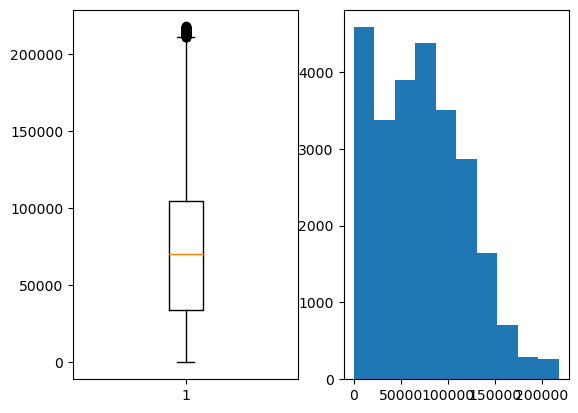

In [24]:
plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage_updated"])
plt.subplot(1,2,2).hist(visa_df["prevailing_wage_updated"])

**Bi variate analysis**

-we already seen uni variate analysis
- we performed the catogorical analysis 
    - frequency table (value counts)
    - bar chart 
    - relative frequency table 
    - pie chart
- we performedthe numerical analysis 
    - histogram
    - distribution plot
    - outlier analysis
    - filling the outliers 
- now we will do catogorical-catogorical analysis
- numerical - numerical analysis
- catogrical - numerical analysi

**catogorical - categorical column**

- lets consider two columns 
    - continents 
    - case status 

In [25]:
continent_val_count=visa_df['continent'].value_counts()


In [26]:
visa_df['case_status'].value_counts()


Certified    17018
Denied        8462
Name: case_status, dtype: int64

**Task**
- find the certified obseration continent wise
- find the denied observation continent wise

In [27]:
#step-1: make the first condition  continent =='asia'
#step-3: make the condition case_status == 'certified'
#step-3: make the third condition :con1&con2
#step-4: then retrive the dataframe and take the count 

In [28]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1&con2
visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_updated
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified,83425.65
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified,78252.14
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified,53635.39
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified,74362.19
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified,83588.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified,77092.57
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified,70308.21
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified,146298.85
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified,86154.77


In [29]:
len(visa_df[con3])
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object')

In [30]:
certified_list,denied_list=[],[]
for i in visa_df['continent'].value_counts().keys():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f"the number of certified visa from{i}:{count}")
    print(f"the number of denied visa from{i}:{den_count}")
    certified_list.append(count)
    denied_list.append(den_count)

the number of certified visa fromAsia:11012
the number of denied visa fromAsia:5849
the number of certified visa fromEurope:2957
the number of denied visa fromEurope:775
the number of certified visa fromNorth America:2037
the number of denied visa fromNorth America:1255
the number of certified visa fromSouth America:493
the number of denied visa fromSouth America:359
the number of certified visa fromAfrica:397
the number of denied visa fromAfrica:154
the number of certified visa fromOceania:122
the number of denied visa fromOceania:70


In [31]:
certified_list,denied_list

([11012, 2957, 2037, 493, 397, 122], [5849, 775, 1255, 359, 154, 70])

In [32]:
continents=visa_df['continent'].value_counts().keys()
continents
certified_list

[11012, 2957, 2037, 493, 397, 122]

In [33]:
cols=['continents',"certified"]
df1=pd.DataFrame(zip(continents,certified_list),columns=cols)
df1

,continents,certified
0,Asia,11012
1,Europe,2957
2,North America,2037
3,South America,493
4,Africa,397
5,Oceania,122


In [34]:
cols=['continents',"denied"]
df2=df1=pd.DataFrame(zip(continents,denied_list),columns=cols)
df2

,continents,denied
0,Asia,5849
1,Europe,775
2,North America,1255
3,South America,359
4,Africa,154
5,Oceania,70


In [35]:
cols=['certified',"denied"]
df3=df1=pd.DataFrame(zip(certified_list,denied_list),index=continents,columns=cols)
df3

,certified,denied
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


**cross tab**

- the above dataframe we can make by usinga method :**cross tab**
- it is available in pandas 
- it takes two columns
    - index
    - columns
- in above data frame index is : continents
- in above data frame data column is :case_status 

In [36]:
df4=pd.crosstab(visa_df['continent'],visa_df["case_status"])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

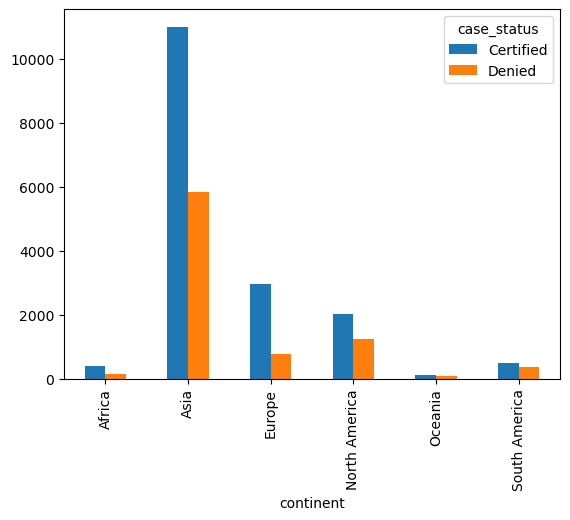

In [37]:
df4.plot(kind='bar')

<Axes: >

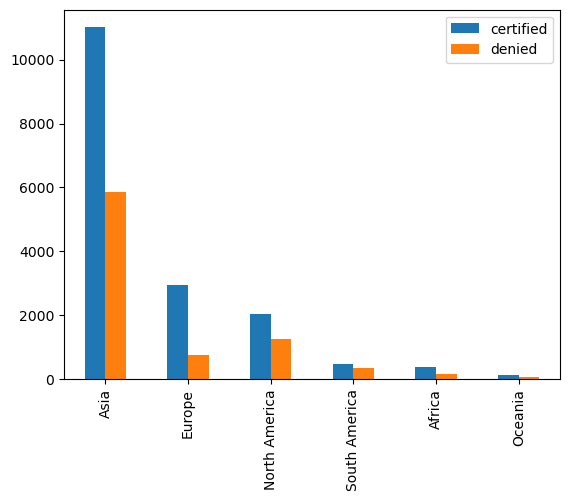

In [38]:
df3.plot(kind='bar')

In [39]:
cat_list

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [40]:
indx_col=visa_df['continent']
data_col=[visa_df['education_of_employee'],visa_df['case_status']]
df5=pd.crosstab(indx_col,data_col)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [41]:
indx_col=visa_df['education_of_employee']
data_col=[visa_df['continent'],visa_df['case_status']]
df5=pd.crosstab(indx_col,data_col)
df5

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [42]:
indx_col=visa_df['case_status']
data_col=[visa_df['continent'],visa_df['education_of_employee']]
df5=pd.crosstab(indx_col,data_col)
df5

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

In [43]:
indx_col=visa_df['continent']
data_col=[visa_df['education_of_employee'],visa_df['case_status']]
df5=pd.crosstab(indx_col,data_col)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

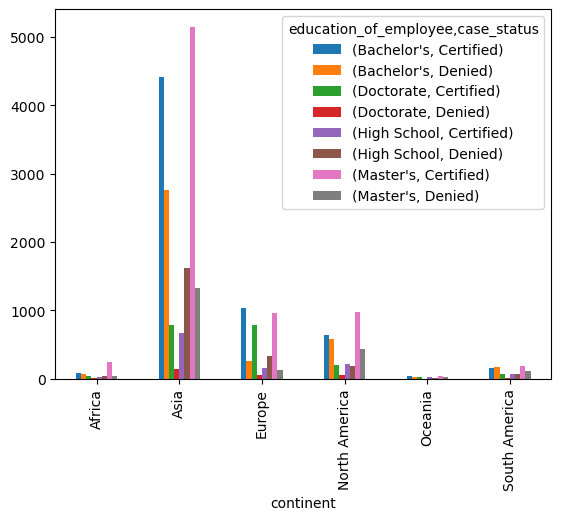

In [44]:
df5.plot(kind='bar')

**numerical-mumerical**

- to understan numerical relation we need to plot scatter plot 
- scatter plot gives the relation between 2 numerical column 
- barchart - pie chart - histogram - scatterplot 
- scatter plot under matplotlib package
- **plt.scatter**

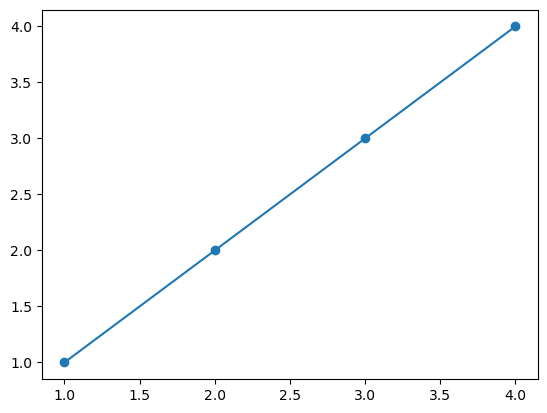

In [46]:
x=[1,2,3,4]
y=[1,2,3,4]
plt.scatter(x,y)
plt.plot(x,y)

In [53]:
l1=[i for i in range(-10,10)]
l2=[i*i for i in l1]


<function matplotlib.pyplot.show(close=None, block=None)>

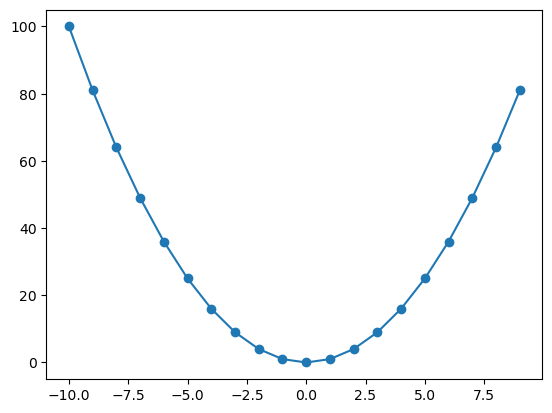

In [56]:
plt.scatter(l1,l2)
plt.plot(l1,l2)
plt.show

In [57]:
num_list

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

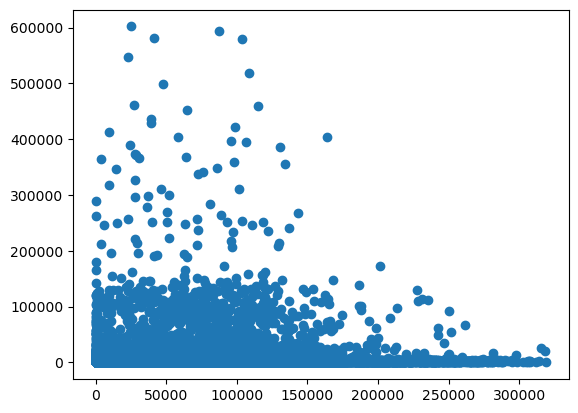

In [59]:
x=visa_df['prevailing_wage']
y=visa_df['no_of_employees']
plt.scatter(x,y)

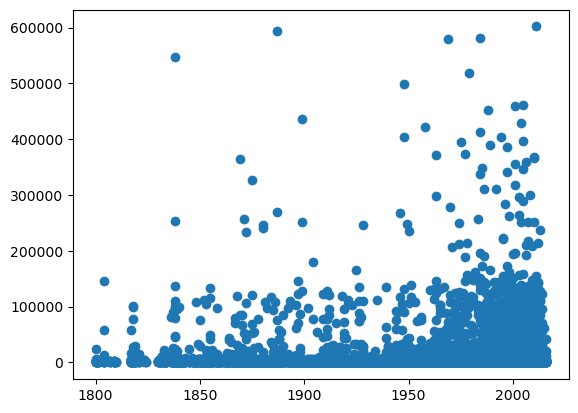

In [60]:
x=visa_df['yr_of_estab']
y=visa_df['no_of_employees']
plt.scatter(x,y)

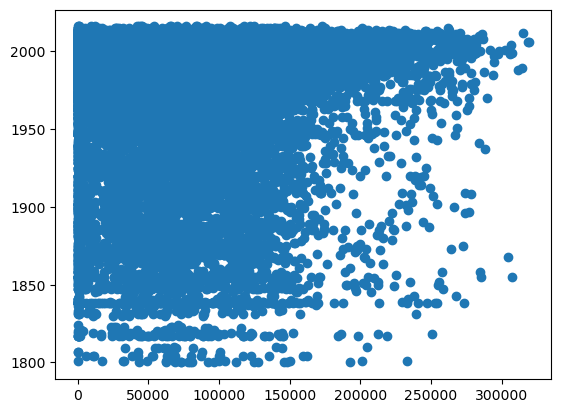

In [61]:
x=visa_df['prevailing_wage']
y=visa_df['yr_of_estab']
plt.scatter(x,y)

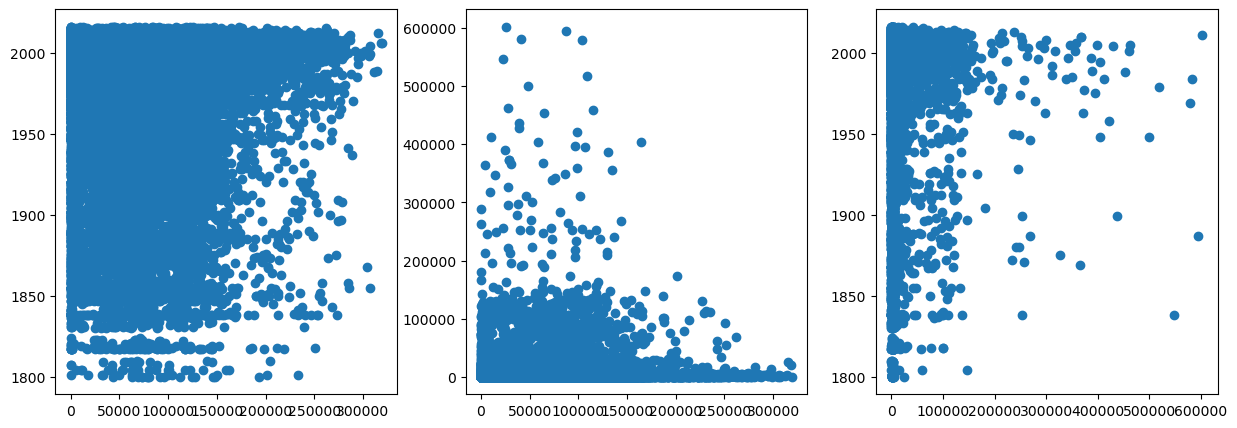

In [64]:
x=visa_df['prevailing_wage']
y=visa_df['yr_of_estab']
z=visa_df['no_of_employees']
plt.figure(figsize=(15,5))
plt.subplot(1,3,1).scatter(x,y)
plt.subplot(1,3,2).scatter(x,z)
plt.subplot(1,3,3).scatter(z,y)



- implement covariance function 
- covariance vs corelation 
    - covariance will tell about the columns have relation or nt 
    - covariance will explain about relation status 
        - positive relation 
        - negaetive relation 
        - no relation 
    - corelation tells about how much relation between two variables
         - it denotes with 'r'
         - r varies from -1 to 1
         - -1 to 0 indicates negetive relation quantity 
         - 0 to 1 indicates positive relation quantity 
         - o indicates no relation 
         
         

**method name:corr**

In [67]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage,prevailing_wage_updated
no_of_employees,1.000000,-0.017770,-0.009523,-0.006762
yr_of_estab,-0.017770,1.000000,0.012342,0.015885
prevailing_wage,-0.009523,0.012342,1.000000,0.900557
prevailing_wage_updated,-0.006762,0.015885,0.900557,1.000000


**Heat Map**

- heat map is the one of the importnt visualization method , to show the matrix form of shape 
- it is under **seaborn** packages
- in every matrix we have heighest value and lowest vslues available 
- heat map will give color visualization 
- also provides color bar, which color indicates whcih value 

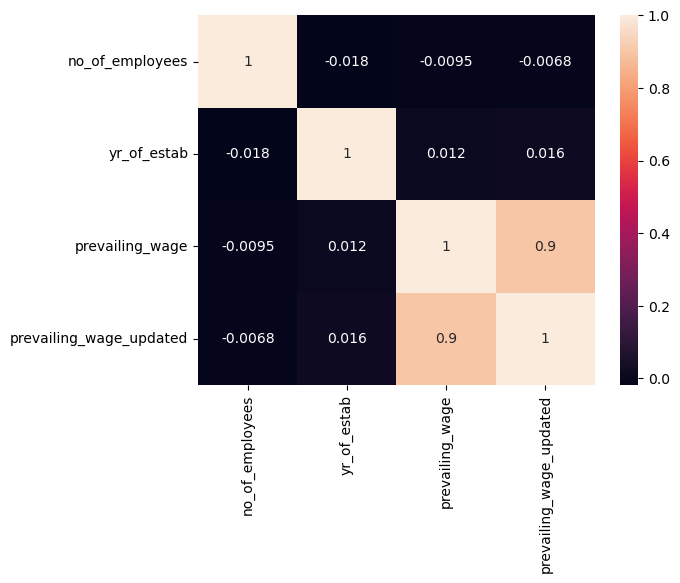

In [72]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

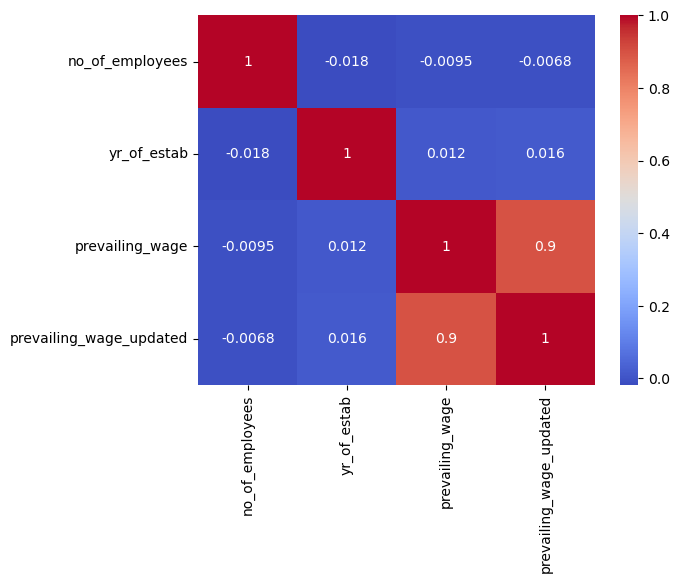

In [77]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

- by seeing the graphs we might not say relation status 
- it is best practice always get the percentage of relation using coorelation 
- all three columns having approxiamtely zero percentage of relation 
- which indicates all the columns having no relation 
- no relation means independent each other 
- in ML models we expect the input columns should be independent each other 
- corr method gives matrix view 
- we have 3 columns 3*3 total 9 columns 
- if we have data has 20 columns then 20*20 total 400
- that's why always go with heatmap visualization 